In [21]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sab

# **Lab 5 - Using link functions to create generalized linear models**

In [23]:
Air_dataframe = pd.read_csv("Airline_data.csv")
Air_dataframe["Miles flown [100 mln miles]"] /=1000
Air_dataframe.rename(columns={"Miles flown [100 mln miles]": "Miles flown [100 bln miles]"}, inplace=True)
Air_dataframe

,Year,Fatal accidents,Passenger deaths,Miles flown [100 bln miles]
0,1976,24,734,3.863
1,1977,25,516,4.300
2,1978,31,754,5.027
3,1979,31,877,5.481
4,1980,22,814,5.814
5,1981,21,362,6.033
6,1982,26,764,5.877
7,1983,20,809,6.223
8,1984,16,223,7.433
9,1985,22,1066,7.107


In [24]:
Air_dataframe.describe()

,Year,Fatal accidents,Passenger deaths,Miles flown [100 bln miles]
count,10.00000,10.000000,10.000000,10.000000
mean,1980.50000,23.800000,691.900000,5.715800
std,3.02765,4.709329,252.389228,1.117768
min,1976.00000,16.000000,223.000000,3.863000
25%,1978.25000,21.250000,570.500000,5.140500
50%,1980.50000,23.000000,759.000000,5.845500
75%,1982.75000,25.750000,812.750000,6.175500
max,1985.00000,31.000000,1066.000000,7.433000


## **Prior predictive analysis**

In [25]:
model_ppc=CmdStanModel(stan_file='code_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,
                     refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [28]:
dataframe = sim.draws_pd()
dataframe.head()

,lp__,accept_stat__,alpha,theta,n_i,lambda,y_i
0,0.0,0.0,3.65409,0.207772,4.30050,94.4064,91.0
1,0.0,0.0,1.88306,0.223984,3.82468,15.4827,13.0
2,0.0,0.0,2.67174,0.206560,5.95311,49.4725,42.0
3,0.0,0.0,2.59947,0.199780,7.14325,56.0670,67.0
4,0.0,0.0,2.12894,0.196889,7.52671,36.9979,40.0


In [27]:
dataframe.describe()

,lp__,accept_stat__,alpha,theta,n_i,lambda,y_i
count,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.0,0.0,2.306777,0.200146,5.626119,36.076833,35.735000
std,0.0,0.0,0.509574,0.010170,1.072289,21.304601,22.015164
min,0.0,0.0,0.510983,0.171025,2.114390,5.450360,4.000000
25%,0.0,0.0,1.988455,0.193593,4.966540,21.597000,21.000000
50%,0.0,0.0,2.312230,0.200226,5.612060,30.809100,31.000000
75%,0.0,0.0,2.641723,0.207172,6.340385,45.124475,45.000000
max,0.0,0.0,3.984550,0.236228,8.850420,219.968000,244.000000


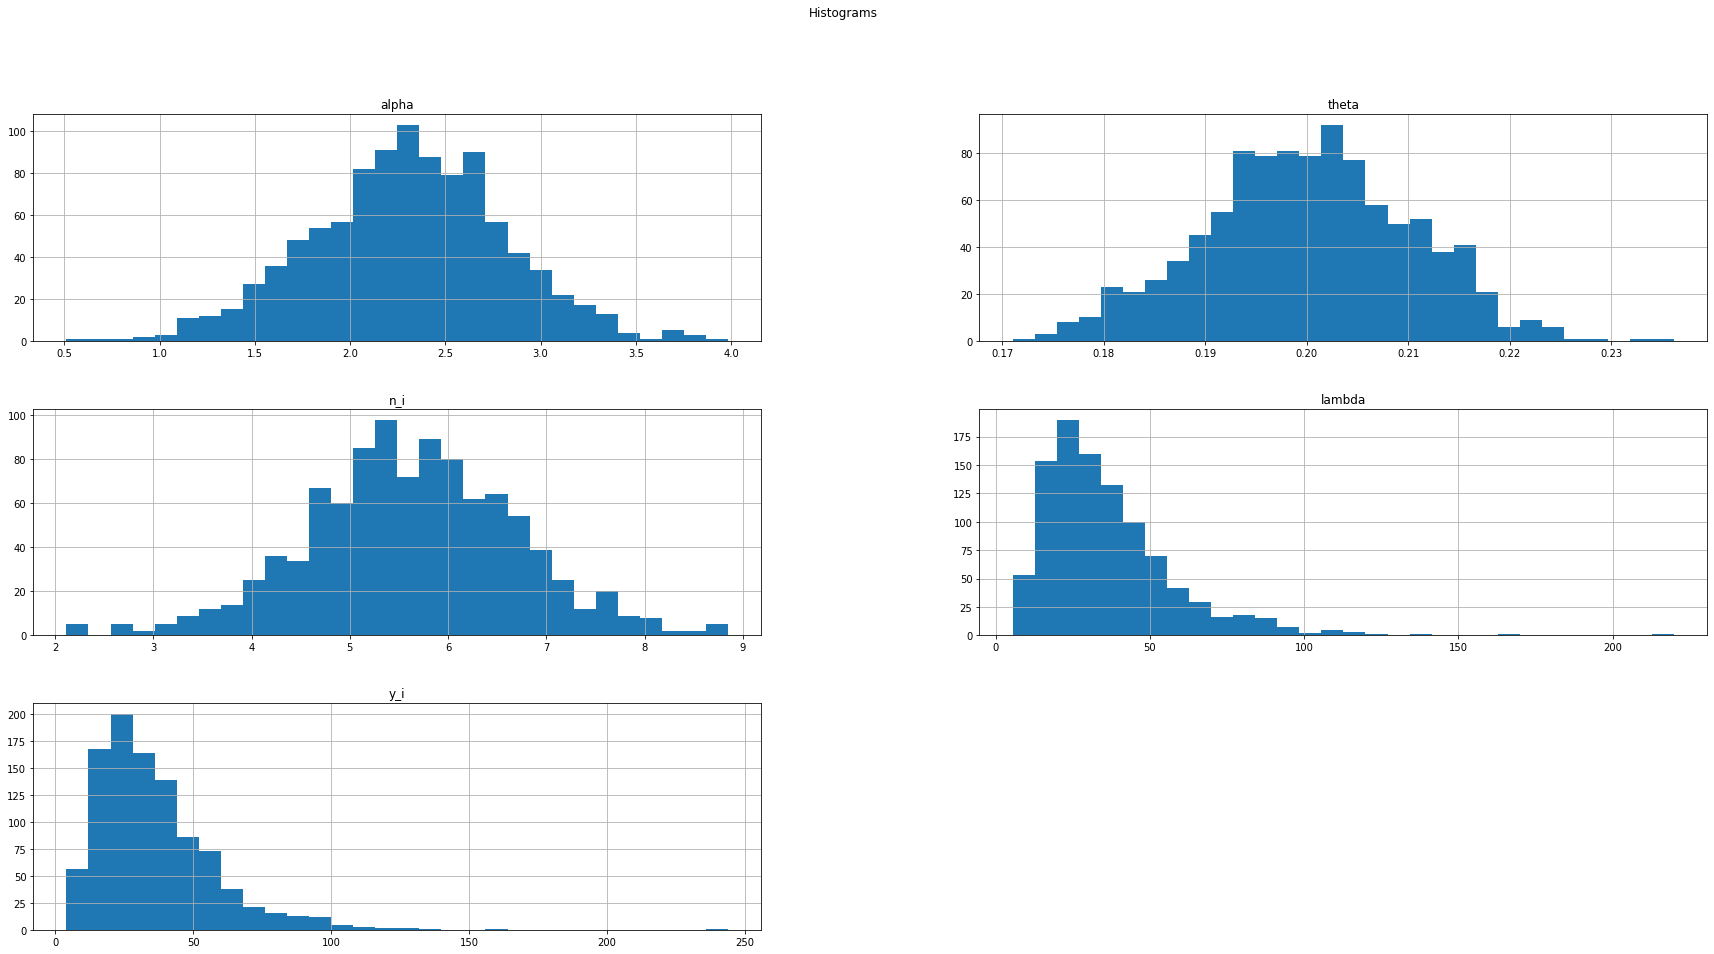

In [29]:
dataframe = dataframe[dataframe.columns[2:7]]
dataframe.hist(bins=30, figsize=(30, 15))
plt.suptitle("Histograms")
plt.show()

## **Posterior predictive distribution including single intercept $\alpha$**

In [30]:
model_1_fit=CmdStanModel(stan_file='code_1_fit.stan')

INFO:cmdstanpy:compiling stan file /home/DA_Volume/AD2023_930/Lab_05/code_1_fit.stan to exe file /home/DA_Volume/AD2023_930/Lab_05/code_1_fit
INFO:cmdstanpy:compiled model executable: /home/DA_Volume/AD2023_930/Lab_05/code_1_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/DA_Volume/AD2023_930/Lab_05/code_1_fit.hpp /home/DA_Volume/AD2023_930/Lab_05/code_1_fit.stan
Warning in '/home/DA_Volume/AD2023_930/Lab_05/code_1_fit.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/DA_Volume/AD2023_930/Lab_05/code_1_fit.stan', line 26, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatic

In [31]:
data_fit = {'N': len(Air_dataframe), 'n': Air_dataframe["Miles flown [100 bln miles]"].values, 'y': Air_dataframe["Fatal accidents"].values}
fit=model_1_fit.sample(data=data_fit,seed=29042020)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [32]:
dataframe=fit.draws_pd()
dataframe.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,lambda[1],...,y_pred[1],y_pred[2],y_pred[3],y_pred[4],y_pred[5],y_pred[6],y_pred[7],y_pred[8],y_pred[9],y_pred[10]
0,505.769,1.000000,0.606374,2.0,3.0,0.0,-505.666,2.08661,0.188398,16.6830,...,16.0,18.0,21.0,21.0,20.0,25.0,17.0,27.0,39.0,26.0
1,505.690,0.959275,0.606374,2.0,7.0,0.0,-505.469,2.01129,0.195064,15.8762,...,12.0,25.0,23.0,26.0,21.0,17.0,18.0,30.0,39.0,38.0
2,505.825,0.997804,0.606374,2.0,7.0,0.0,-505.525,2.04516,0.192604,16.2678,...,15.0,13.0,21.0,21.0,21.0,25.0,24.0,39.0,37.0,38.0
3,502.750,0.491923,0.606374,2.0,7.0,0.0,-500.556,2.24382,0.185581,19.3118,...,20.0,24.0,38.0,20.0,22.0,35.0,27.0,23.0,33.0,38.0
4,502.027,0.783255,0.606374,1.0,1.0,0.0,-501.416,2.25606,0.186693,19.6338,...,18.0,16.0,27.0,25.0,35.0,32.0,26.0,39.0,27.0,35.0


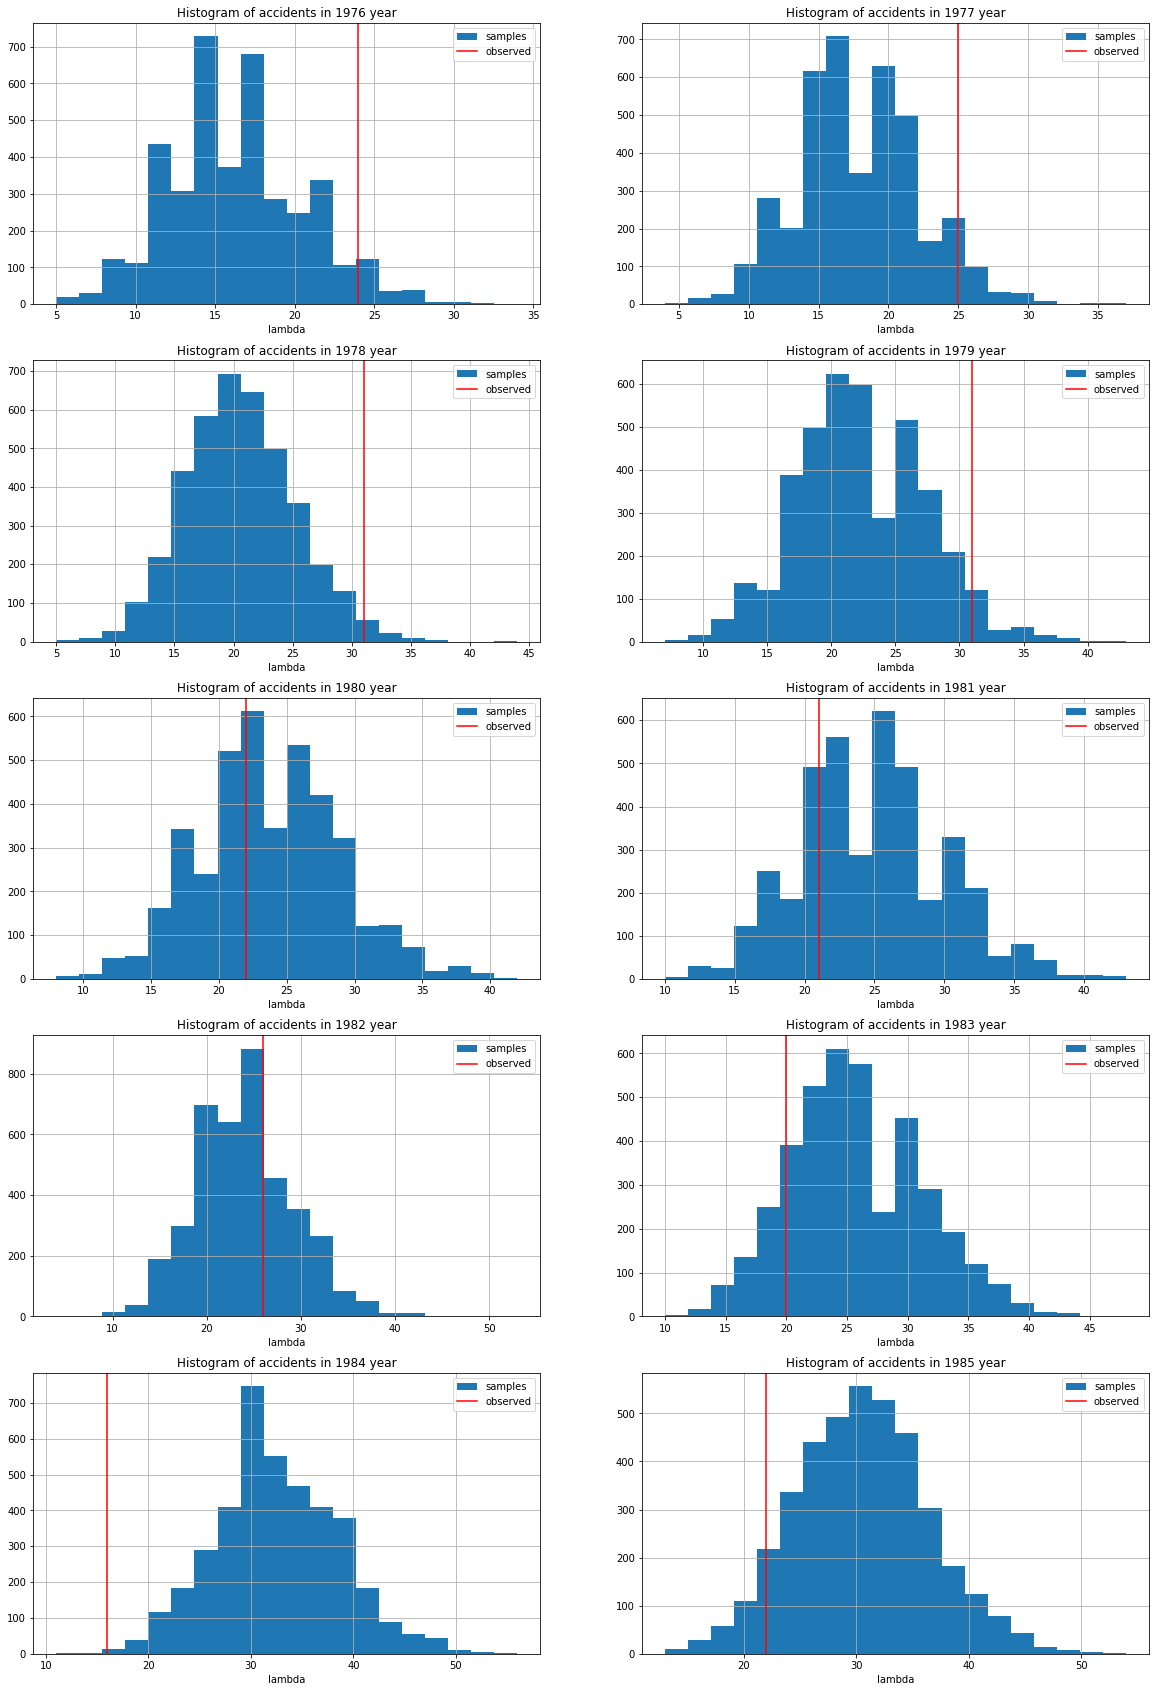

In [45]:
years = Air_dataframe["Year"]

plt.figure(figsize=(20, 30))
for i in range(len(years)):
    plt.subplot(int(len(years)/2), 2, i+1)
    plt.hist(dataframe[f"y_pred[{i+1}]"], bins=20, label="samples")
    plt.title(f"Histogram of accidents in {years[i]} year")
    plt.axvline(x=Air_dataframe["Fatal accidents"][i], label="observed", color="r")
    plt.xlabel("lambda")
    plt.grid()
    plt.legend()

## **Posterior predictive distribution (individual $\alpha_i$ for years)**

In [46]:
model_2_fit=CmdStanModel(stan_file='code_2_fit.stan')

INFO:cmdstanpy:compiling stan file /home/DA_Volume/AD2023_930/Lab_05/code_2_fit.stan to exe file /home/DA_Volume/AD2023_930/Lab_05/code_2_fit
INFO:cmdstanpy:compiled model executable: /home/DA_Volume/AD2023_930/Lab_05/code_2_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/DA_Volume/AD2023_930/Lab_05/code_2_fit.hpp /home/DA_Volume/AD2023_930/Lab_05/code_2_fit.stan
Warning in '/home/DA_Volume/AD2023_930/Lab_05/code_2_fit.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/DA_Volume/AD2023_930/Lab_05/code_2_fit.stan', line 26, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatic

In [47]:
data_fit = {'N': len(Air_dataframe), 'n': Air_dataframe["Miles flown [100 bln miles]"].values, 'y': Air_dataframe["Fatal accidents"].values}
fit=model_2_fit.sample(data=data_fit,seed=29042020)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [48]:
dataframe=fit.draws_pd()
dataframe.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha[1],alpha[2],alpha[3],...,y_pred[1],y_pred[2],y_pred[3],y_pred[4],y_pred[5],y_pred[6],y_pred[7],y_pred[8],y_pred[9],y_pred[10]
0,511.458,0.961972,0.586683,3.0,7.0,0.0,-506.092,2.43925,2.40962,2.27724,...,25.0,21.0,18.0,30.0,28.0,26.0,26.0,19.0,19.0,17.0
1,513.444,0.773134,0.586683,3.0,7.0,0.0,-499.038,2.33117,2.28104,2.25080,...,23.0,35.0,27.0,35.0,26.0,15.0,25.0,14.0,28.0,17.0
2,510.494,0.812263,0.586683,3.0,7.0,0.0,-505.299,2.52920,1.94681,2.38384,...,29.0,20.0,37.0,23.0,29.0,28.0,22.0,28.0,20.0,9.0
3,509.368,0.940242,0.586683,3.0,7.0,0.0,-504.539,2.40155,2.46341,2.39440,...,19.0,25.0,27.0,50.0,20.0,26.0,22.0,25.0,17.0,22.0
4,511.932,0.997066,0.586683,3.0,7.0,0.0,-506.084,2.46597,2.28792,2.53405,...,26.0,28.0,31.0,21.0,23.0,21.0,26.0,34.0,22.0,23.0


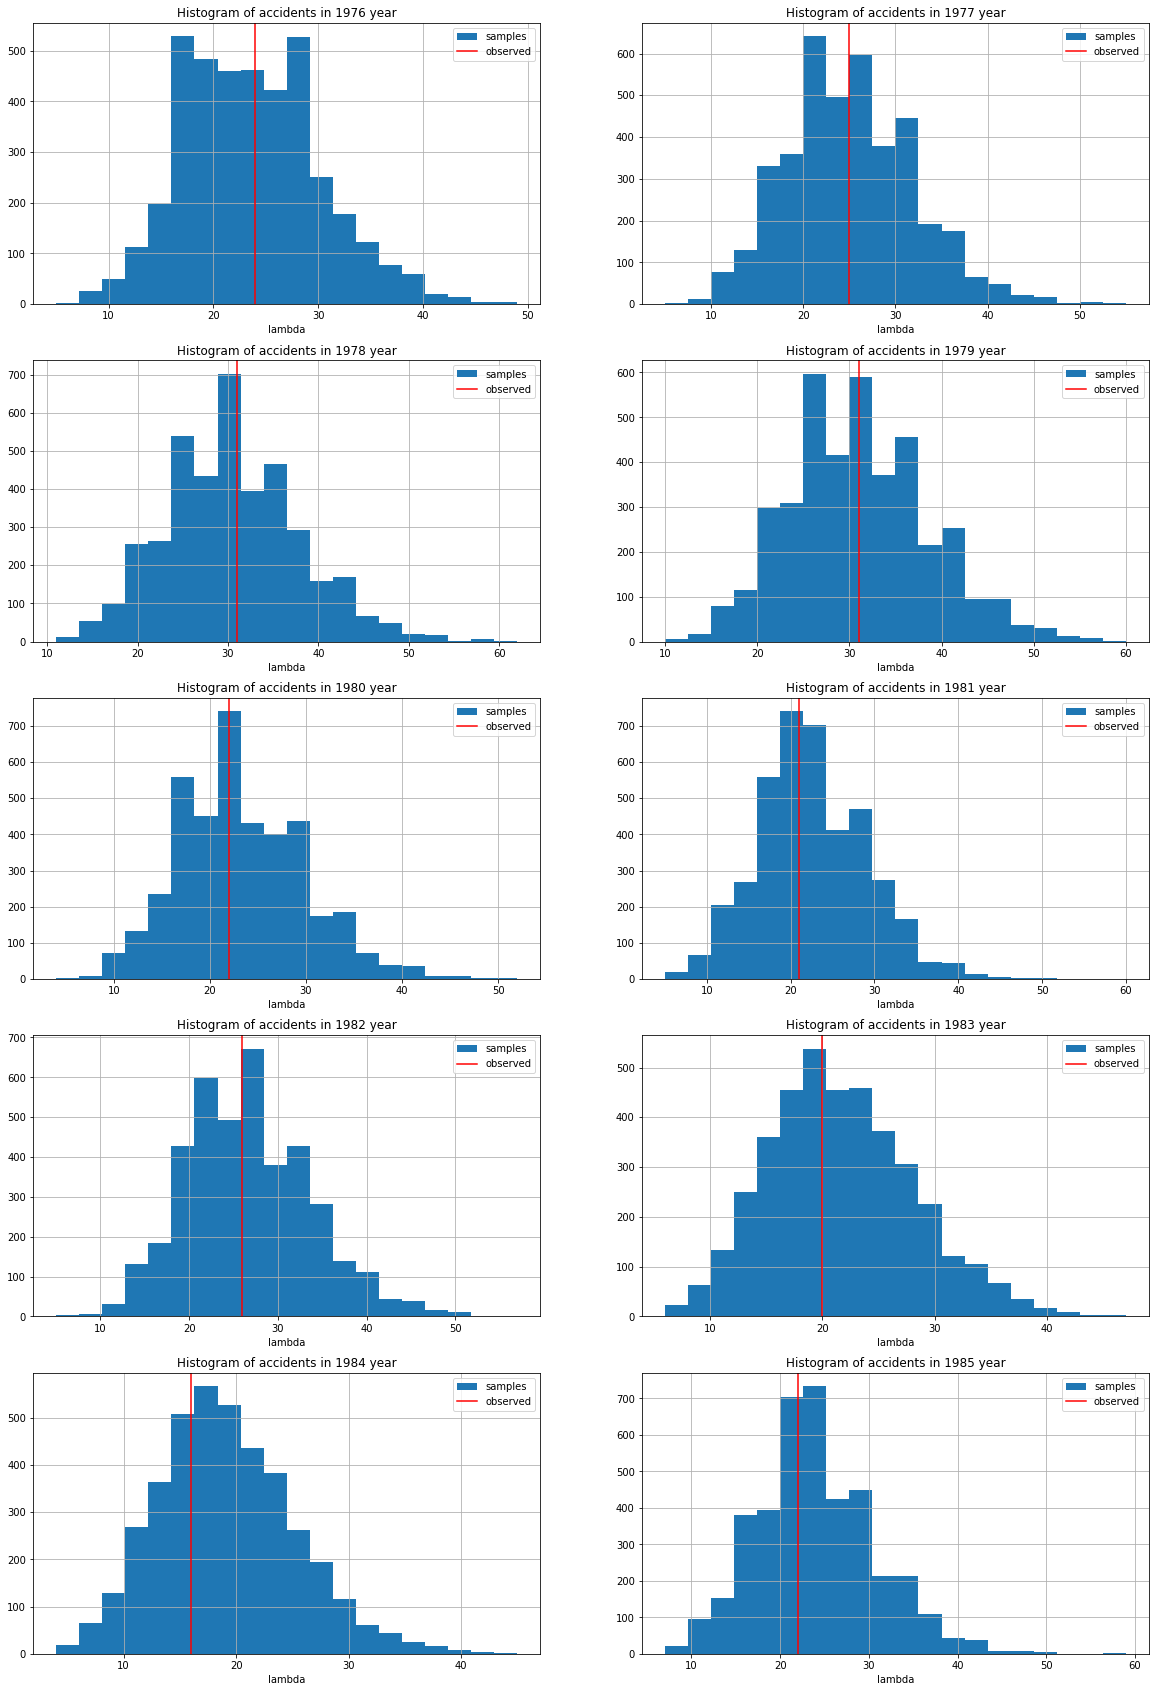

In [49]:
years = Air_dataframe["Year"]

plt.figure(figsize=(20, 30))
for i in range(len(years)):
    plt.subplot(int(len(years)/2), 2, i+1)
    plt.hist(dataframe[f"y_pred[{i+1}]"], bins=20, label="samples")
    plt.title(f"Histogram of accidents in {years[i]} year")
    plt.axvline(x=Air_dataframe["Fatal accidents"][i], label="observed", color="r")
    plt.xlabel("lambda")
    plt.grid()
    plt.legend()

#### Thanks to individual intercepts $\alpha_i$ for each years the model fits the observed data much better.